# Importar bibliotecas

In [3]:
import os
import pandas as pd
import time
from tqdm import tqdm

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Importar dados

In [5]:

data_folder = '/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/processed_data/new_try'


paths = ['x_one_train.csv', 'y_one_train.csv','x_one_test.csv','y_one_test.csv'] 

dfs_one = []
for path in paths:
    dfs_one.append(pd.read_csv(os.path.join(data_folder,path)))

paths = ['x_mul_train.csv','y_mul_train.csv','x_mul_test.csv','y_mul_test.csv']
dfs_mul = []
for path in paths:
    dfs_mul.append(pd.read_csv(os.path.join(data_folder,path)))

# paths = ['x_sur_test.csv','y_sur_test.csv']
# dfs_sur = []
# for path in paths:
#     dfs_sur.append(pd.read_csv(os.path.join(data_folder,path)))
      


# Analise

## Instanciar classificadores

In [6]:
classificadores_one = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(),
}

In [7]:
one_results = pd.DataFrame()
one_results['algoritmos'] = classificadores_one.keys()
one_results.head(7)


,algoritmos
0,Logistic Regression
1,XGBoost


In [8]:
eval_set = [(dfs_one[0], dfs_one[1]), (dfs_one[2], dfs_one[3])]

In [9]:
tempo_treinamento = []
for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    inicio = time.time()
    if clf == 'XGBoost':
        classificadores_one[clf].fit(dfs_one[0], dfs_one[1].values.ravel(), eval_set=eval_set, verbose=True)
    else:
        classificadores_one[clf].fit(dfs_one[0], dfs_one[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
one_results['tempo_treinamento'] = tempo_treinamento
one_results.head(7)


Classifiers:  50%|█████     | 1/2 [00:02<00:02,  2.95s/it]

[0]	validation_0-logloss:0.45246	validation_1-logloss:0.63737
[1]	validation_0-logloss:0.31442	validation_1-logloss:0.63085
[2]	validation_0-logloss:0.22809	validation_1-logloss:0.66228
[3]	validation_0-logloss:0.17014	validation_1-logloss:0.70361
[4]	validation_0-logloss:0.12911	validation_1-logloss:0.73667
[5]	validation_0-logloss:0.10049	validation_1-logloss:0.77697
[6]	validation_0-logloss:0.07814	validation_1-logloss:0.75159
[7]	validation_0-logloss:0.06201	validation_1-logloss:0.80814
[8]	validation_0-logloss:0.05043	validation_1-logloss:0.76499
[9]	validation_0-logloss:0.04173	validation_1-logloss:0.74741
[10]	validation_0-logloss:0.03584	validation_1-logloss:0.83877
[11]	validation_0-logloss:0.03142	validation_1-logloss:0.88143
[12]	validation_0-logloss:0.02812	validation_1-logloss:0.92009
[13]	validation_0-logloss:0.02545	validation_1-logloss:0.93454
[14]	validation_0-logloss:0.02296	validation_1-logloss:0.97237
[15]	validation_0-logloss:0.02132	validation_1-logloss:0.96719
[1

Classifiers: 100%|██████████| 2/2 [00:06<00:00,  3.10s/it]


,algoritmos,tempo_treinamento
0,Logistic Regression,2.952712
1,XGBoost,3.239983


In [10]:
classificadores_mul = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost' : XGBClassifier(objective='multi:softmax')
}


In [11]:
mul_results = pd.DataFrame()
mul_results['algoritmos'] = classificadores_mul.keys()
mul_results.head(7)

,algoritmos
0,Logistic Regression
1,XGBoost


In [12]:
eval_set = [(dfs_mul[0], dfs_mul[1]), (dfs_mul[2], dfs_mul[3])]

In [13]:
tempo_treinamento = []
for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    inicio = time.time()
    if clf == 'XGBoost':
        classificadores_mul[clf].fit(dfs_mul[0], dfs_mul[1].values.ravel(), eval_set=eval_set, verbose=True)
    else:
        classificadores_mul[clf].fit(dfs_mul[0], dfs_mul[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
mul_results['tempo_treinamento'] = tempo_treinamento
mul_results.head(7)

Classifiers:   0%|          | 0/2 [00:00<?, ?it/s]

[0]	validation_0-mlogloss:1.04442	validation_1-mlogloss:1.93416
[1]	validation_0-mlogloss:0.71303	validation_1-mlogloss:1.89981
[2]	validation_0-mlogloss:0.51016	validation_1-mlogloss:1.89881
[3]	validation_0-mlogloss:0.37318	validation_1-mlogloss:1.87509
[4]	validation_0-mlogloss:0.27663	validation_1-mlogloss:1.89848
[5]	validation_0-mlogloss:0.20712	validation_1-mlogloss:1.95939
[6]	validation_0-mlogloss:0.15687	validation_1-mlogloss:2.01946
[7]	validation_0-mlogloss:0.11975	validation_1-mlogloss:2.09591
[8]	validation_0-mlogloss:0.09240	validation_1-mlogloss:2.16519
[9]	validation_0-mlogloss:0.07200	validation_1-mlogloss:2.24339
[10]	validation_0-mlogloss:0.05656	validation_1-mlogloss:2.31953
[11]	validation_0-mlogloss:0.04518	validation_1-mlogloss:2.37177
[12]	validation_0-mlogloss:0.03675	validation_1-mlogloss:2.42056
[13]	validation_0-mlogloss:0.03025	validation_1-mlogloss:2.48997
[14]	validation_0-mlogloss:0.02532	validation_1-mlogloss:2.58149
[15]	validation_0-mlogloss:0.02153	

Classifiers: 100%|██████████| 2/2 [00:06<00:00,  3.22s/it]


,algoritmos,tempo_treinamento
0,Logistic Regression,0.082349
1,XGBoost,6.348998


In [14]:
mul_results['tempo_treinamento'] = tempo_treinamento
mul_results.head(7)

,algoritmos,tempo_treinamento
0,Logistic Regression,0.082349
1,XGBoost,6.348998


## Avaliacao

### One attacks

In [15]:
acc_one  = []
prec_one = []
rec_one  = []
loss_one = []
time_one = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_one[2])
    # Predict probabilities for the positive class
    pred_probs = classificadores_one[clf].predict_proba(dfs_one[2])[:, 1]
    time_one.append(time.process_time() - start_time)
    
    acc_one.append(accuracy_score(dfs_one[3],predicoes))
    prec_one.append(precision_score(dfs_one[3],predicoes,average='macro'))
    rec_one.append(recall_score(dfs_one[3],predicoes,average='macro'))
    loss_one.append(log_loss(dfs_one[3],pred_probs))
    
one_results['accuracy']        = acc_one
one_results['precision']       = prec_one
one_results['recall']          = rec_one
one_results['tempo_predicoes'] = time_one
one_results['log_loss']        = loss_one

one_results.head(7)

Classifiers: 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes,log_loss
0,Logistic Regression,2.952712,0.861071,0.880552,0.861071,0.022531,0.713854
1,XGBoost,3.239983,0.716027,0.716570,0.716027,0.191110,1.126809


### Multiple Attacks

In [16]:
acc_mul  = []
prec_mul = []
rec_mul  = []
loss_mul = []
time_mul = []

for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    start_time = time.process_time()
    predicoes = classificadores_mul[clf].predict(dfs_mul[2])
    # Predict probabilities for the positive class
    pred_probs = classificadores_mul[clf].predict_proba(dfs_mul[2])
    time_mul.append(time.process_time() - start_time)
    
    acc_mul.append(accuracy_score(dfs_mul[3], predicoes))
    prec_mul.append(precision_score(dfs_mul[3], predicoes, average='macro', zero_division=0))
    rec_mul.append(recall_score(dfs_mul[3], predicoes, average='macro'))
    loss_mul.append(log_loss(dfs_mul[3], pred_probs))

mul_results['accuracy']        = acc_mul
mul_results['precision']       = prec_mul
mul_results['recall']          = rec_mul
mul_results['log_loss']        = loss_mul
mul_results['tempo_predicoes'] = time_mul

mul_results.head(7)

Classifiers: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,log_loss,tempo_predicoes
0,Logistic Regression,0.082349,0.259048,0.288959,0.259048,2.298418,0.025735
1,XGBoost,6.348998,0.367698,0.341995,0.367698,4.049148,0.883196


### Surprise Attacks

In [14]:
sur_results = pd.DataFrame()
sur_results['algoritmos'] = classificadores_one.keys()

acc_sur  = []
prec_sur = []
rec_sur  = []
time_sur = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_sur[0])
    time_sur.append(time.process_time() - start_time)
    
    acc_sur.append(accuracy_score(dfs_sur[1],predicoes))
    prec_sur.append(precision_score(dfs_sur[1],predicoes,average='macro'))
    rec_sur.append(recall_score(dfs_sur[1],predicoes,average='macro'))
    
sur_results['accuracy']        = acc_sur
sur_results['precision']       = prec_sur
sur_results['recall']          = rec_sur
sur_results['tempo_predicoes'] = time_sur

sur_results.head(7)

Classifiers:   0%|          | 0/2 [00:00<?, ?it/s]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Classifiers: 100%|██████████| 2/2 [00:00<00:00, 29.18it/s]


,algoritmos,accuracy,precision,recall,tempo_predicoes
0,Logistic Regression,0.369591,0.5,0.184796,0.003950
1,XGBoost,0.428401,0.5,0.214200,0.059129


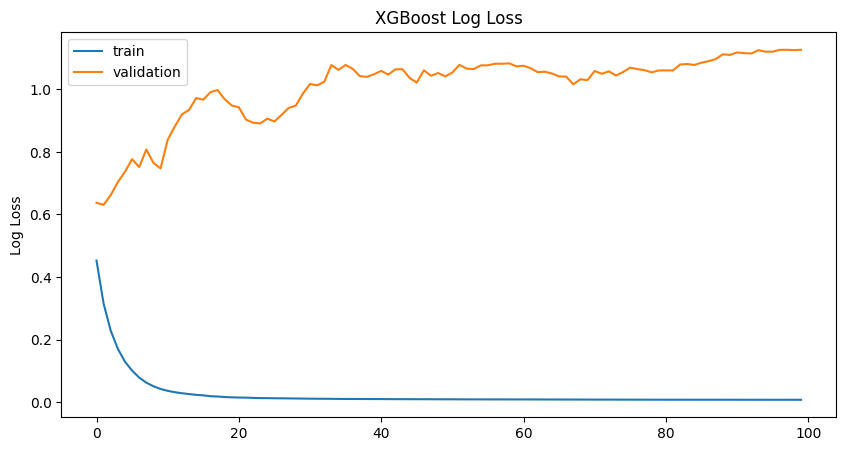

In [20]:
results = classificadores_one['XGBoost'].evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='validation')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(os.path.join("/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/central/one", 'xg-boost-central.png'))
plt.show()

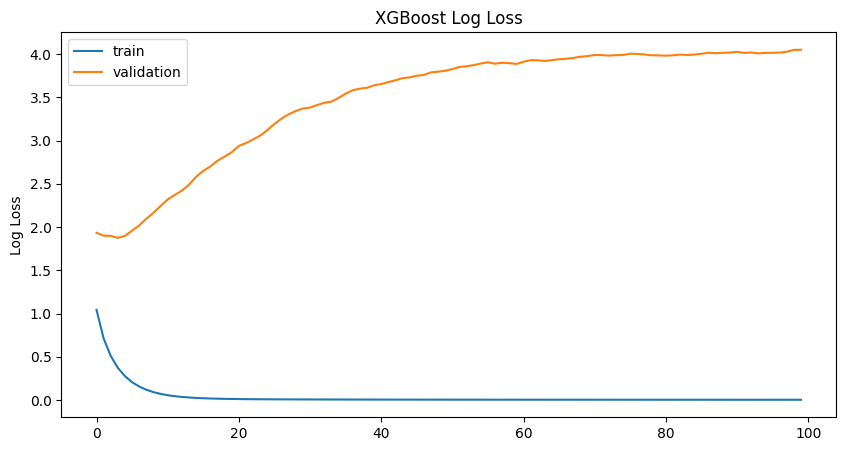

In [21]:
results = classificadores_mul['XGBoost'].evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='validation')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(os.path.join("/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/central/mul", 'xg-boost-central.png'))
plt.show()  

## Comparar

<Axes: xlabel='recall', ylabel='algoritmos'>

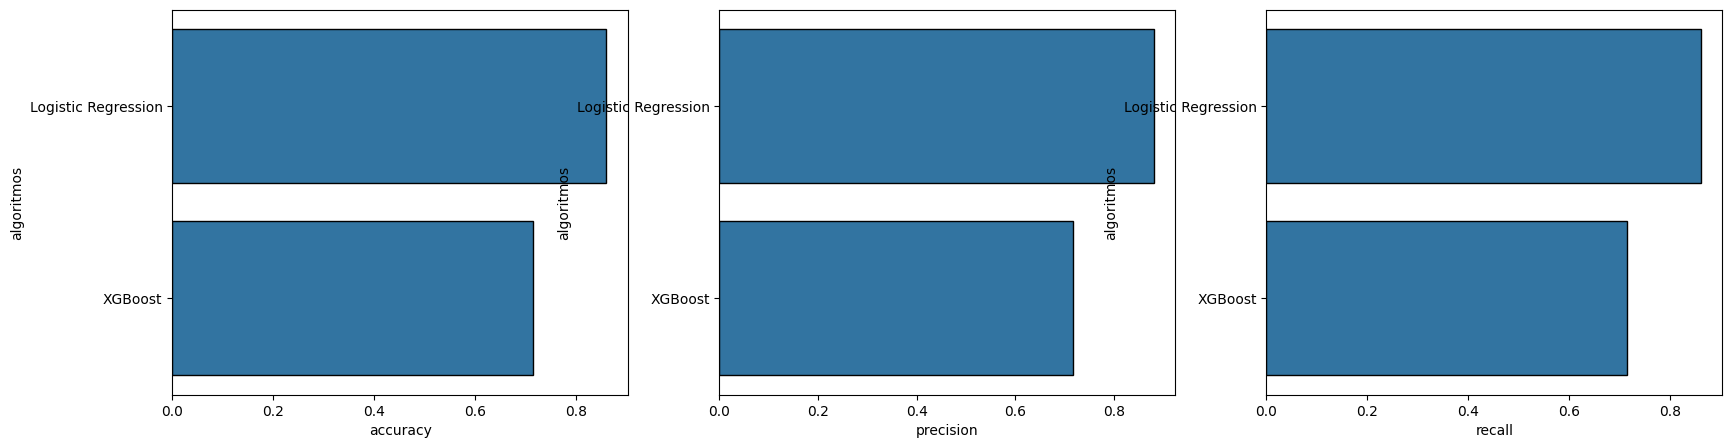

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=one_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=one_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=one_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

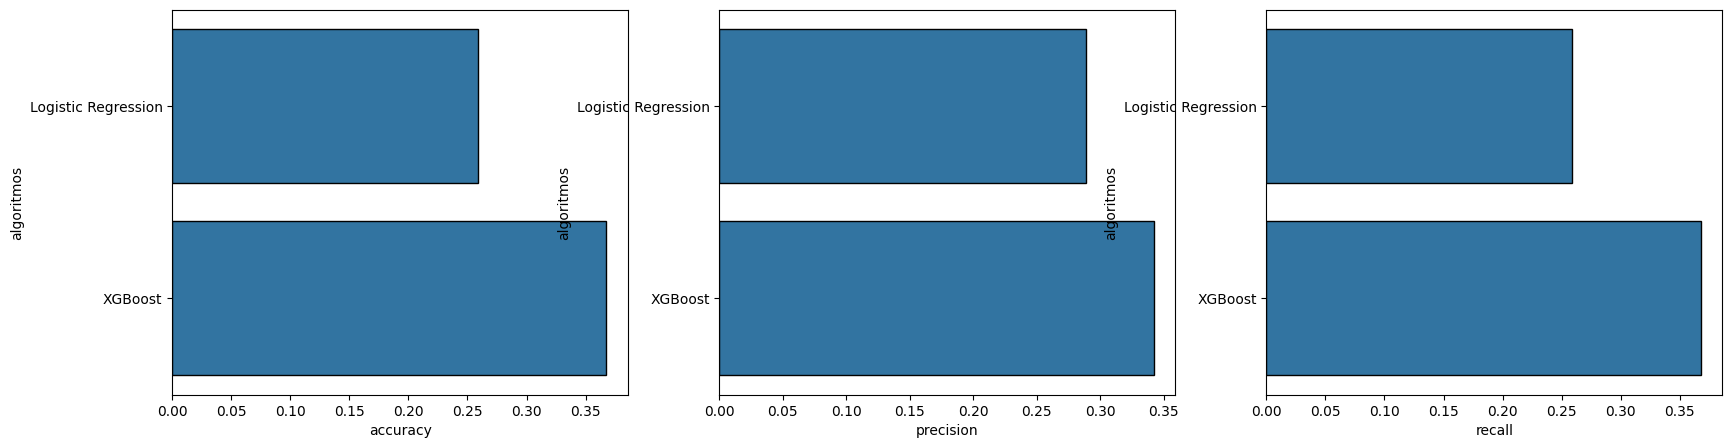

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=mul_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=mul_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=mul_results, ax=ax[2],ec='k',orient='h')

In [25]:
# fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

# sns.barplot(y='algoritmos', x='accuracy', data=sur_results, ax=ax[0],ec='k',orient='h')
# sns.barplot(y='algoritmos', x='precision', data=sur_results, ax=ax[1],ec='k',orient='h')
# sns.barplot(y='algoritmos', x='recall', data=sur_results, ax=ax[2],ec='k',orient='h')

## Matriz de confusão

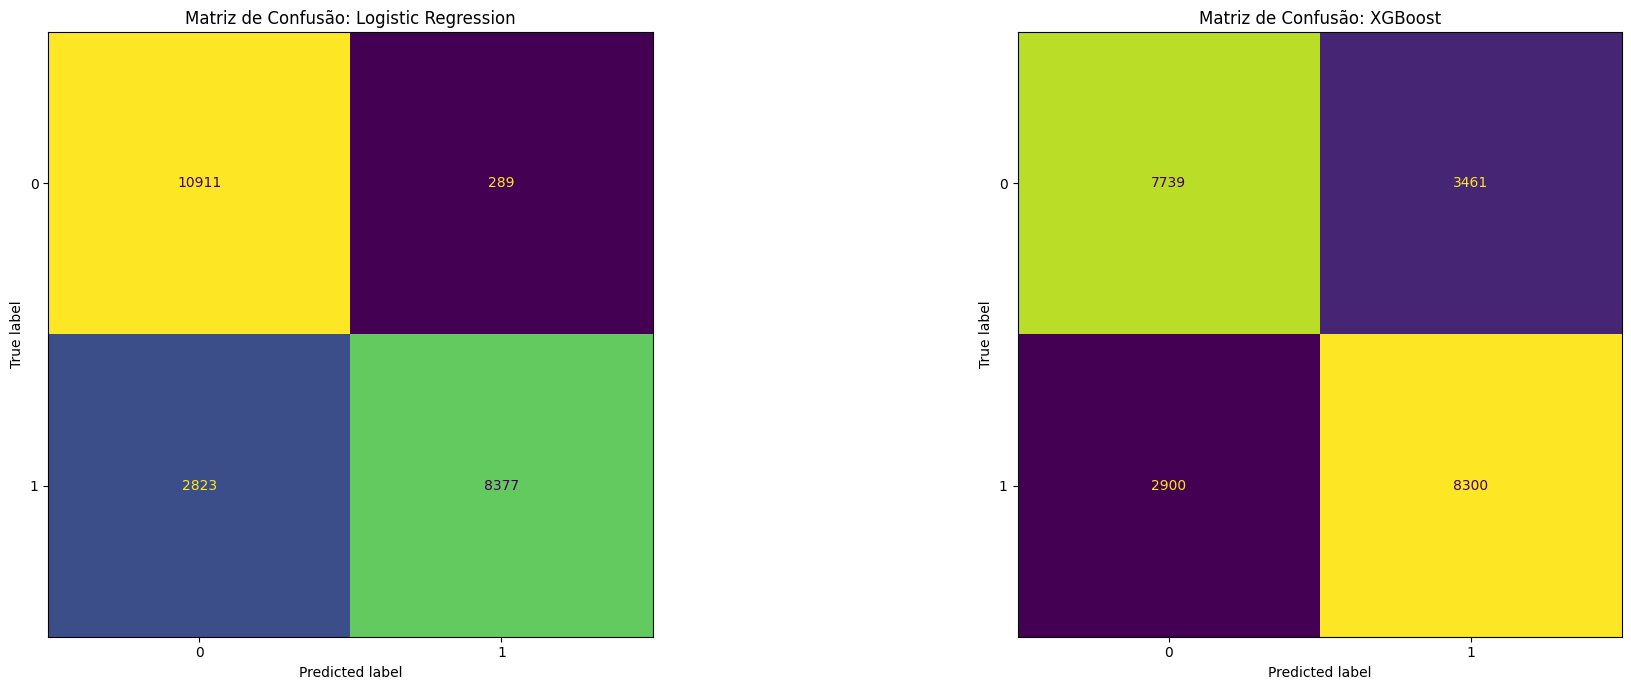

In [31]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(17,7))

for idx,clf in enumerate(classificadores_one.keys()):
    cf_matrix = confusion_matrix(dfs_one[3],classificadores_one[clf].predict(dfs_one[2]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx],colorbar=False)
    ax[idx].set_title(f"Matriz de Confusão: {clf}")


plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()


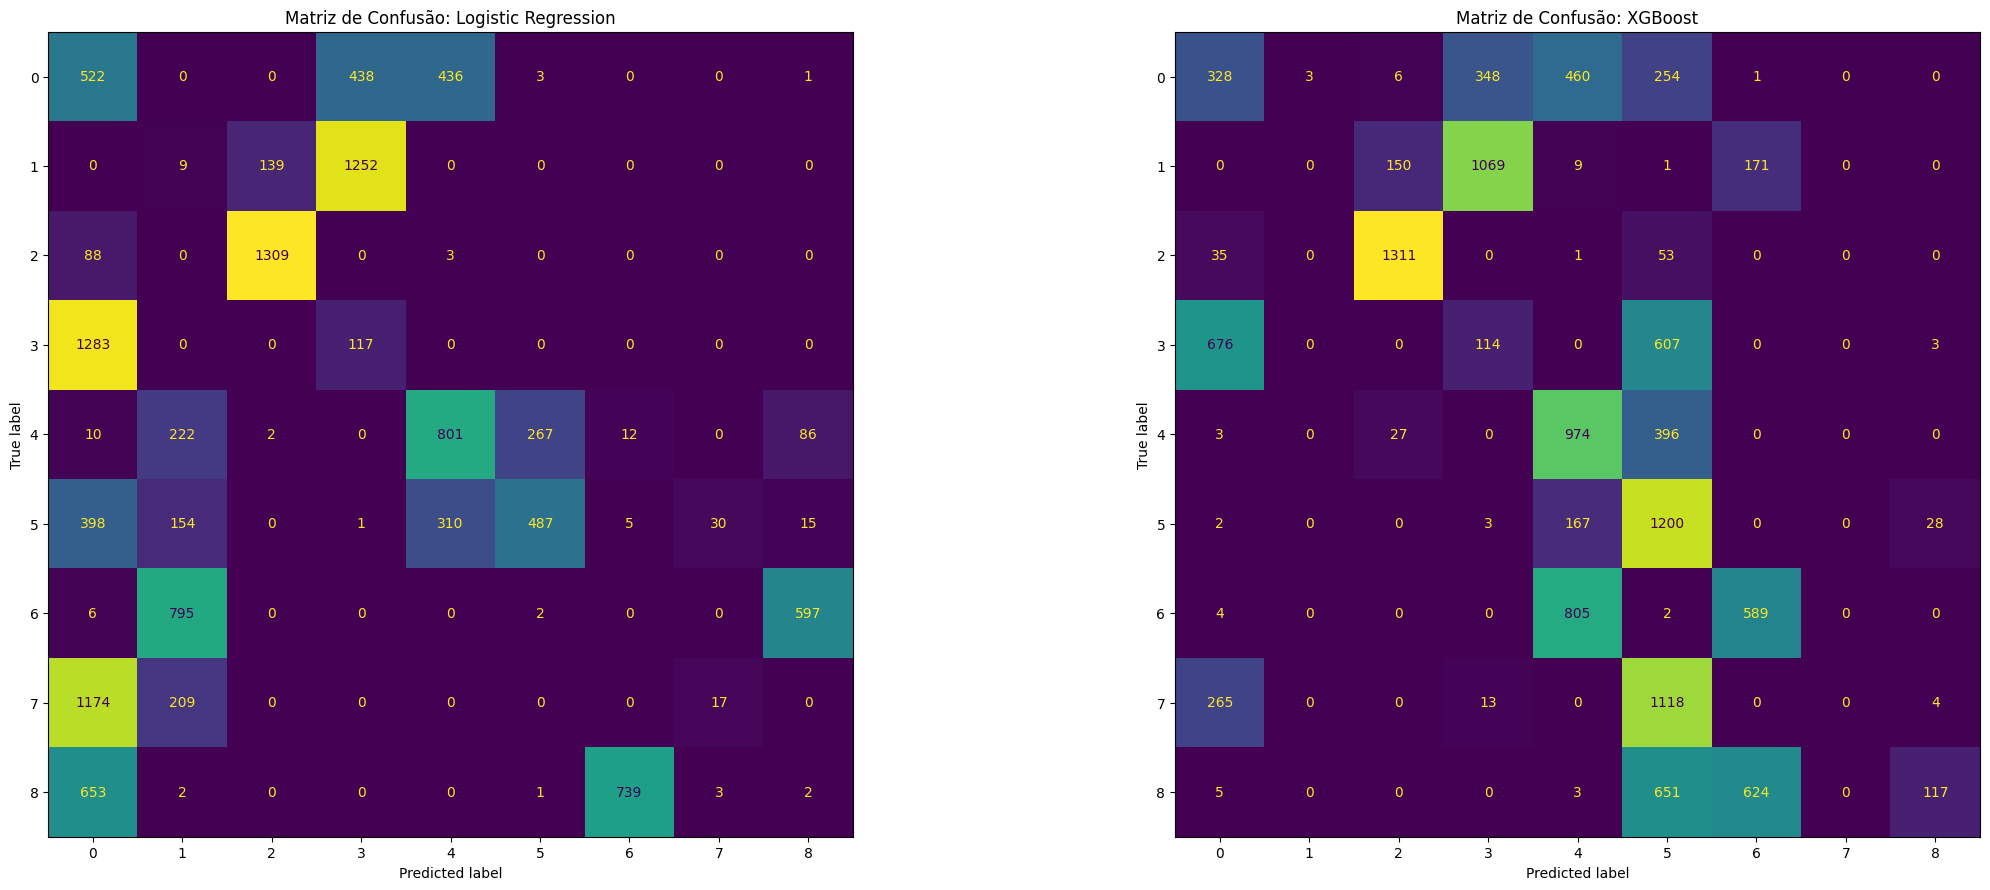

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

for idx, clf in enumerate(classificadores_mul.keys()):
    cf_matrix = confusion_matrix(dfs_mul[3], classificadores_mul[clf].predict(dfs_mul[2]))
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx], colorbar=False)
    ax[idx].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

In [32]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# for idx,clf in enumerate(classificadores_mul.keys()):
#     cf_matrix = confusion_matrix(dfs_sur[1],classificadores_one[clf].predict(dfs_sur[0]))
#     disp      = ConfusionMatrixDisplay(cf_matrix)
#     disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
#     ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")

# plt.tight_layout()
# fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

# plt.show()

## Salvar resultados

In [33]:
one_results

,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes,log_loss
0,Logistic Regression,2.952712,0.861071,0.880552,0.861071,0.022531,0.713854
1,XGBoost,3.239983,0.716027,0.716570,0.716027,0.191110,1.126809


In [34]:

for df, name in ((one_results, "one"), (mul_results, "mul")):
    results_directory = '/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/central/' + name 
    results_file = os.path.join(results_directory, 'central_res.csv')
    results = pd.read_csv(results_file)
    for index, row in df.iterrows():
        model_info = {
            'Model Name': row['algoritmos'],
            'Loss': row['log_loss'],
            'Accuracy': row['accuracy'],
            'Precision': row['precision'],
            'Recall': row['recall'],
            'Training Time': row['tempo_treinamento'],
        }
        print(model_info)
        new_row_df = pd.DataFrame([model_info])
        results = pd.concat([results, new_row_df], ignore_index=True)
    results.to_csv(results_file, index=False)


{'Model Name': 'Logistic Regression', 'Loss': 0.7138541260124548, 'Accuracy': 0.8610714285714286, 'Precision': 0.8805515032560727, 'Recall': 0.8610714285714285, 'Training Time': 2.952711820602417}
{'Model Name': 'XGBoost', 'Loss': 1.126808692733453, 'Accuracy': 0.7160267857142857, 'Precision': 0.7165701464689641, 'Recall': 0.7160267857142857, 'Training Time': 3.239982843399048}
{'Model Name': 'Logistic Regression', 'Loss': 2.298418015204564, 'Accuracy': 0.259047619047619, 'Precision': 0.28895865179524055, 'Recall': 0.259047619047619, 'Training Time': 0.08234906196594238}
{'Model Name': 'XGBoost', 'Loss': 4.049148259111704, 'Accuracy': 0.3676984126984127, 'Precision': 0.3419954628640743, 'Recall': 0.36769841269841275, 'Training Time': 6.3489978313446045}
